# Q4 - Ideia da solução

### Vídeo da execução

A solução está publicada neste endereço:
[https://youtu.be/qxBQ9_C_35s](https://youtu.be/qxBQ9_C_35s)

Código da solução:
[https://github.com/mirwox/prova1_2020/blob/solution/p1_20/scripts/Q4_scan_grafico.py](https://github.com/mirwox/prova1_2020/blob/solution/p1_20/scripts/Q4_scan_grafico.py)


Vamos estudar a solução:

![](saida_q4.png)

In [1]:
import cv2
import imutils
import matplotlib.pyplot as plt

frame = cv2.imread("saida_q4.png")

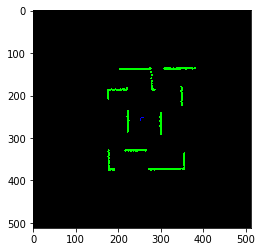

In [2]:
# pip install imutils
plt.imshow(imutils.opencv2matplotlib(frame)) # A imutils só faz a conversão de BGR para RGB antes de dar plt

Estamos interessados no maior objeto. 

Vamos lembrar que na Aula 2 vimos como achar um contorno de maior área.

### Plot do canal verde

Não é preciso usar o inRange. Vamos nos aproveitar do fato de que os prints são em verde puro, conforme visto no código python.

In [3]:
verde = frame[:,:,1]

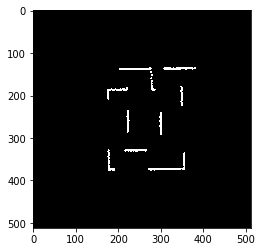

In [4]:
plt.imshow(imutils.opencv2matplotlib(verde))

# Contornos em verde

Vamos trazer o código de contorno de maior área visto na [aula de Contornos](https://github.com/Insper/robot20/blob/master/aula02/aula2_OpenCV_Filtragem.ipynb)

In [5]:
### Funções trazidas do exemplo da aula 2
def center_of_contour(contorno):
    """ Retorna uma tupla (cx, cy) que desenha o centro do contorno"""
    M = cv2.moments(contorno)
    # Usando a expressão do centróide definida em: https://en.wikipedia.org/wiki/Image_moment
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    return (int(cX), int(cY))

def crosshair(img, point, size, color):
    """ Desenha um crosshair centrado no point.
        point deve ser uma tupla (x,y)
        color é uma tupla R,G,B uint8
    """
    x,y = point
    cv2.line(img,(x - size,y),(x + size,y),color,2)
    cv2.line(img,(x,y - size),(x, y + size),color,2)

### Combinacao de códigos da aula 2
def acha_maior_contorno_centro(gray):
    """ Estamos trabalhando com BGR como cores
        Retorna uma imagem com os contornos desenhados e a coordenada do centro do maior contorno
    """
    contornos, arvore = cv2.findContours(gray.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(bgr, contornos, -1, [255, 0, 0], 1);
    
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    maior = None
    maior_area = 0
    for c in contornos:
        area = cv2.contourArea(c)
        if area > maior_area:
            maior_area = area
            maior = c
            
    p = center_of_contour(maior)      
    cv2.drawContours(bgr, [maior], -1, [0, 0, 255], 2);
    crosshair(bgr, p, 5, (0,255,0))
    
    return bgr, p
    
## Funções trazidas do exemplo da aula 2

In [6]:
cont_bgr, p = acha_maior_contorno_centro(verde)
c = (256, 256)
crosshair(cont_bgr, c, 5, (0,0,255))


### Identificação dos contornos

Vamos ver como fica a função de processamento dos contornos



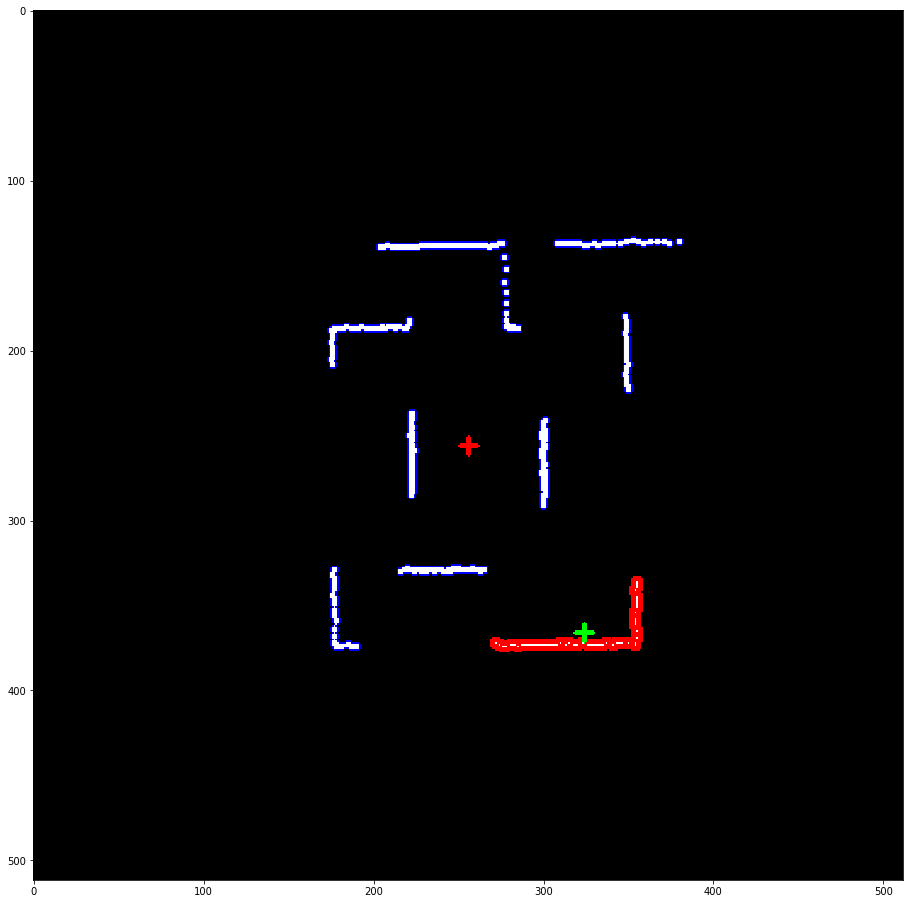

In [7]:
plt.figure(figsize=(16,16))
plt.imshow(imutils.opencv2matplotlib(cont_bgr))

# Ideia do algoritmo

Podemos girar o robô até que o centro do maior contorno (mostrado em vermelho acima) esteja na vertical do vermelho.

In [15]:
import math

deltay = p[1]-c[1]
deltax = p[0]-c[0]

In [16]:
ang = math.atan(deltax/deltay)

In [17]:
math.degrees(ang)

31.723602957684026